Primera Simulación
-----------------------------
En esta primera simulación vamos a tratar de simular una señal recibida por la antena.
Para resolver la parte mas facil primero, generemos la función que nos genera la señal de distancia entre la antena y la persona. Para esta señal vamos a tener como aleatorios 7 elementos.
- La distancia $d_0$
- La frecuencia respiratoria
- La amplitud respiratoria
- La frecuencia cardiaca
- La amplitud cardiaca
- La fase de la respiracion
- La fase del ritmo cardiaco

Para la frecuencia respiratoria la voy a simular con una uniforme entre dos frecuencias, basicamente porque es una idea inicial.

Para la frecuencia cardiaca voy a iniciar con una variable normal para simular a una persona en reposo con una leve variaciòn posible de persona a persona. Eso luego puede cambiar a una uniforme que modele que la persona puede estar en reposo o puede estar agitada por distintas razones.

Para tener en cuenta, las distancias se van a medir en centimetros para esta primera simulación.



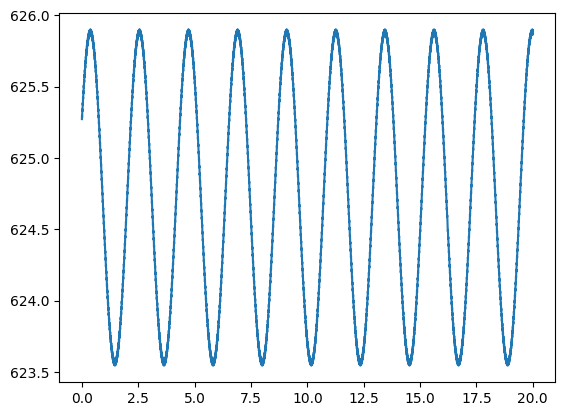

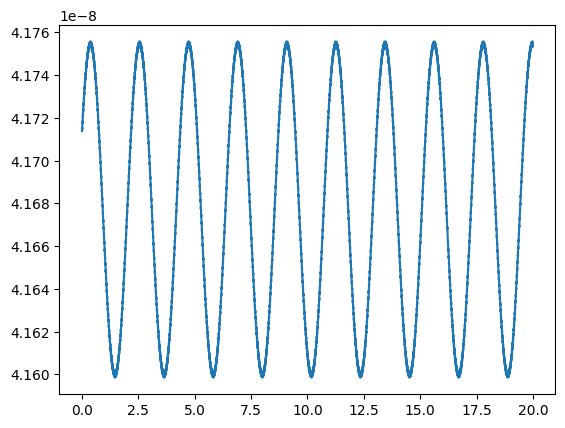

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def Evaluacion_Señal_Lenta(Tiempo, Distancia, AmpResp, FrecResp, FaseResp, AmpCard, FrecCard, FaseCard):
    # AmpResp es la Amplitud Respiratoria
    # FrecResp es la Frecuencia Respiratoria
    # FaseResp es la Fase de la señal de la respiracion
    # AmpCard es la Amplitud Cardiaca
    # FrecCard es la Frecuancia Cardiaca
    # FaseCard es la Fase de la señal cardiaca
    Señal_Respiratoria = AmpResp * np.sin(2*np.pi*FrecResp*Tiempo + FaseResp)
    Señal_Cardiaca = AmpCard * np.sin(2*np.pi* FrecCard*Tiempo + FaseCard)
    return Distancia + Señal_Respiratoria + Señal_Cardiaca


###### Defino las constantes para las generaciones de los pulsos de señal lenta
### Comienzo por la definicion de las constantes de la señal lenta
Amplitud_Respiratoria_Minima = 0.4
Amplitud_Respiratoria_Maxima = 1.2
Amplitud_Cardiaca_Minima = 0.01                  ## Este valor es un valor inicial para simular el ritmo cardiaco
Amplitud_Cardiaca_Maxima = 0.02              ## Este valor es un valor inicial para la simulacion del ritmo cardiaco

Frecuencia_Respiratoria_Inferior = 0.1
Frecuencia_Respiratoria_Superior = 0.7
Frecuencia_Cardiaca_Superior = 1/60
Frecuencia_Cardiaca_Inferior = 1/90

Distancia_Paciente_Minima = 400
Distancia_Paciente_Maxima = 1000

Periodo_Muestreo_Lenta = 0.002

###### Comienzo las simulaciones de la señal lenta
### Muestra de las variables aleatorias
np.random.seed(42)

Distancia_Paciente = np.random.uniform(Distancia_Paciente_Minima, Distancia_Paciente_Maxima) 

Amplitud_Respitatoria = np.random.uniform(low = Amplitud_Respiratoria_Minima, high = Amplitud_Respiratoria_Maxima, size = 1)
Amplitud_Cardiaca = np.random.uniform(low = Amplitud_Cardiaca_Minima, high = Amplitud_Cardiaca_Maxima, size = 1)

Frecuencia_Respiratoria = np.random.uniform(low = Frecuencia_Respiratoria_Inferior, high = Frecuencia_Respiratoria_Superior, size = 1)
Frecuencia_Cardiaca = np.random.uniform(low = Frecuencia_Cardiaca_Inferior, high = Frecuencia_Cardiaca_Superior, size = 1)

Fase_Respiracion = np.random.uniform(0, np.pi)
Fase_Cardiaca = np.random.uniform(0, np.pi)

ValoresLinea = np.linspace(0,10,int(10/Periodo_Muestreo_Lenta))
Resultado_Desfasaje = Evaluacion_Señal_Lenta(ValoresLinea, Distancia_Paciente, Amplitud_Respitatoria, Frecuencia_Respiratoria,
                                   Fase_Respiracion, Amplitud_Cardiaca, Frecuencia_Cardiaca, Fase_Cardiaca)

plt.figure()
plt.plot(ValoresLinea,Resultado_Desfasaje)

Velocidad_Luz = 299792458   ## Metros por segundo
                            ## 29979245800 es en centimetros por segundo
Velocidad_Luz_V2 = 29979245800

Fesfasaje = Resultado_Desfasaje/Velocidad_Luz_V2 * 2 ## El *2 esta porque el trayecto es ida y vuelta de la onda

plt.figure()
plt.plot(ValoresLinea,Fesfasaje)


(4e-08, 5e-08)

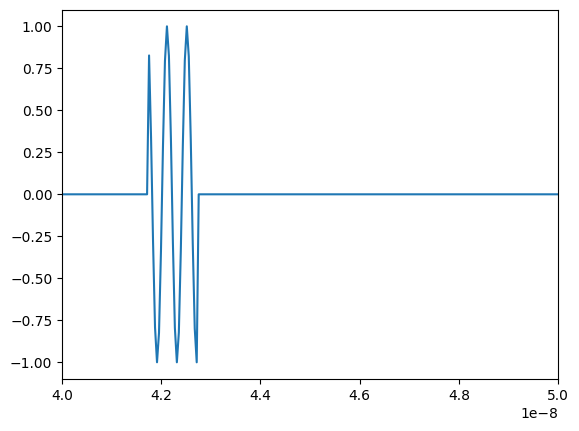

In [ ]:
###### Comienzo a generar la señal rapida
### Primero genero la funcion para evaluar la señal de frecuencia rapida

def Evaluacion_Señal_Lenta_Escalon(Muestreo_Rapido, Desfasaje_Señal, Frecuencia_Portadora, Periodo_Pulso):
    Frecuencia_Portadora = 1/(Ancho_De_Banda_Fraccional * Periodo_Pulso)
    Nuevos_Tiempos_Muestras = Muestreo_Rapido - Desfasaje_Señal
    Resultado_Parcial = np.cos(2*np.pi*Frecuencia_Portadora*Nuevos_Tiempos_Muestras)
    Resultado = np.zeros([len(Muestreo_Rapido)])

    for i in range(len(Nuevos_Tiempos_Muestras)):
        if (Nuevos_Tiempos_Muestras[i] >= 0 and Nuevos_Tiempos_Muestras[i] <= Periodo_Pulso/2) :
            Resultado[i] = Resultado_Parcial[i]
    return Resultado

#### Esta es un ejemplo de generacion de onda rapida
Ancho_De_Banda_Fraccional = 0.2
Desfasaje_Señal = Fesfasaje[4]
Periodo_Pulso = 2 * (10**(-9))
Frecuencia_Portadora = 1/(Ancho_De_Banda_Fraccional * Periodo_Pulso)
Frecuencia_Muestreo_Rapida = Frecuencia_Portadora* 10
#Muestreo_Rapido  = np.linspace(0,10**(-7),10000)
Muestreo_Rapido  = np.linspace(0,10**(-7),int(10**(-7)*Frecuencia_Muestreo_Rapida))


Nuevos_Tiempos_Muestras = Muestreo_Rapido - Desfasaje_Señal
Resultado_Parcial = np.cos(2*np.pi*Frecuencia_Portadora*Nuevos_Tiempos_Muestras)
Resultado = np.zeros([len(Muestreo_Rapido)])

for i in range(len(Nuevos_Tiempos_Muestras)):
    if (Nuevos_Tiempos_Muestras[i] >= 0 and Nuevos_Tiempos_Muestras[i] <= Periodo_Pulso/2) :
        Resultado[i] = Resultado_Parcial[i]

#Resultado = np.where(Nuevos_Tiempos_Muestras>=0 & Nuevos_Tiempos_Muestras <= Periodo_Pulso/2, Resultado_Parcial,0)[0]

plt.figure()
plt.plot(Muestreo_Rapido, Resultado)
plt.xlim([0.4*(10**(-7)), 0.5*(10**(-7))])

(4.1499999999999994e-08, 4.2999999999999995e-08)

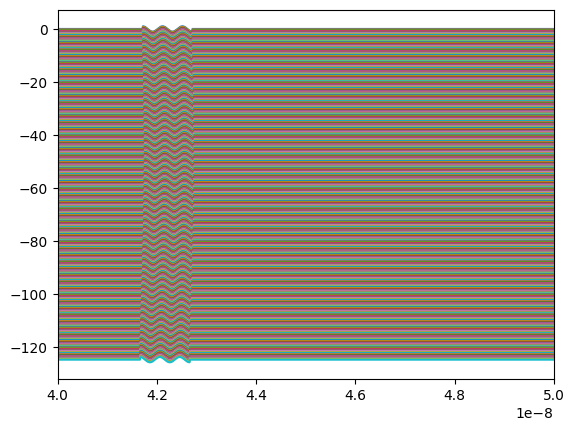

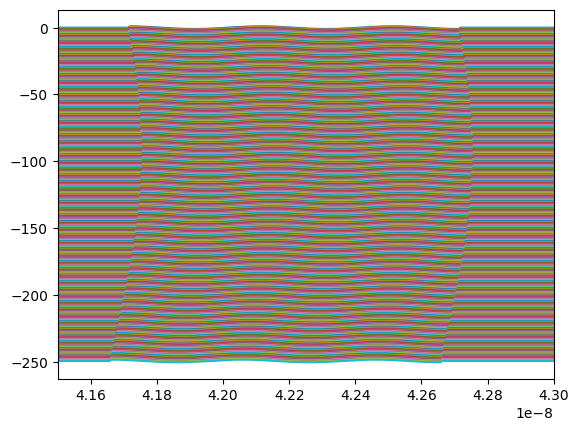

In [3]:
### Entonces podemos utilizar ambos codigos para generar la matriz de muestras rapidas y lentas

import numpy as np
import matplotlib.pyplot as plt
import random

def Evaluacion_Señal_Lenta(Tiempo, Distancia, AmpResp, FrecResp, FaseResp, AmpCard, FrecCard, FaseCard):
    Señal_Respiratoria = AmpResp * np.sin(2*np.pi*FrecResp*Tiempo + FaseResp)
    Señal_Cardiaca = AmpCard * np.sin(2*np.pi* FrecCard*Tiempo + FaseCard)
    return Distancia + Señal_Respiratoria + Señal_Cardiaca

Amplitud_Respiratoria_Minima = 0.4
Amplitud_Respiratoria_Maxima = 1.2
Amplitud_Cardiaca_Minima = 0.01                  ## Este valor es un valor inicial para simular el ritmo cardiaco
Amplitud_Cardiaca_Maxima = 0.02              ## Este valor es un valor inicial para la simulacion del ritmo cardiaco
Frecuencia_Respiratoria_Inferior = 0.1
Frecuencia_Respiratoria_Superior = 0.7
Frecuencia_Respiratoria_Inferior = 0.1
Frecuencia_Respiratoria_Superior = 0.7
Frecuencia_Cardiaca_Superior = 1/60
Frecuencia_Cardiaca_Inferior = 1/90

Distancia_Paciente_Minima = 400
Distancia_Paciente_Maxima = 1000

Periodo_Muestreo_Lenta = 0.002

Velocidad_Luz_V2 = 29979245800

###### Comienzo las simulaciones de la señal lenta
np.random.seed(42)

Distancia_Paciente = np.random.uniform(Distancia_Paciente_Minima, Distancia_Paciente_Maxima) 

Amplitud_Respitatoria = np.random.uniform(low = Amplitud_Respiratoria_Minima, high = Amplitud_Respiratoria_Maxima, size = 1)
Amplitud_Cardiaca = np.random.uniform(low = Amplitud_Cardiaca_Minima, high = Amplitud_Cardiaca_Maxima, size = 1)

Frecuencia_Respiratoria = np.random.uniform(low = Frecuencia_Respiratoria_Inferior, high = Frecuencia_Respiratoria_Superior, size = 1)
Frecuencia_Cardiaca = np.random.uniform(low = Frecuencia_Cardiaca_Inferior, high = Frecuencia_Cardiaca_Superior, size = 1)

Fase_Respiracion = np.random.uniform(0, np.pi)
Fase_Cardiaca = np.random.uniform(0, np.pi)

ValoresLinea = np.linspace(0,1,int(1/Periodo_Muestreo_Lenta))
Resultado_Desfasaje = Evaluacion_Señal_Lenta(ValoresLinea, Distancia_Paciente, Amplitud_Respitatoria, Frecuencia_Respiratoria,
                                   Fase_Respiracion, Amplitud_Cardiaca, Frecuencia_Cardiaca, Fase_Cardiaca)

Fesfasaje = Resultado_Desfasaje/Velocidad_Luz_V2 * 2 ## El *2 esta porque el trayecto es ida y vuelta de la onda

###### Comienzo de La señal rapida
def Evaluacion_Señal_Lenta_Escalon(Muestreo_Rapido, Desfasaje_Señal, Frecuencia_Portadora, Periodo_Pulso):
    Frecuencia_Portadora = 1/(Ancho_De_Banda_Fraccional * Periodo_Pulso)
    Nuevos_Tiempos_Muestras = Muestreo_Rapido - Desfasaje_Señal
    Resultado_Parcial = np.cos(2*np.pi*Frecuencia_Portadora*Nuevos_Tiempos_Muestras)
    Resultado = np.zeros([len(Muestreo_Rapido)])

    for i in range(len(Nuevos_Tiempos_Muestras)):
        if (Nuevos_Tiempos_Muestras[i] >= 0 and Nuevos_Tiempos_Muestras[i] <= Periodo_Pulso/2) :
            Resultado[i] = Resultado_Parcial[i]
    return Resultado

Ancho_De_Banda_Fraccional = 0.2

Desfasaje_Señal = Fesfasaje[4]
Periodo_Pulso = 2 * (10**(-9))
Frecuencia_Portadora = 1/(Ancho_De_Banda_Fraccional * Periodo_Pulso)

Frecuencia_Muestreo_Rapida = Frecuencia_Portadora* 100
#Muestreo_Rapido  = np.linspace(0,10**(-7),10000)
Muestreo_Rapido  = np.linspace(0,0.6*10**(-7),int(0.6*10**(-7)*Frecuencia_Muestreo_Rapida))


Matriz_Dos_Velocidades = np.zeros([len(ValoresLinea),len(Muestreo_Rapido)])  ## No recuerdo bien el nombre de la matriz
Matriz_Dos_Velocidades_grafco = np.zeros([len(ValoresLinea),len(Muestreo_Rapido)])  ## No recuerdo bien el nombre de la matriz

for i in range(len(ValoresLinea)):
    Matriz_Dos_Velocidades[i,:] = Evaluacion_Señal_Lenta_Escalon(Muestreo_Rapido,Fesfasaje[i] ,Frecuencia_Portadora, Periodo_Pulso)
    Matriz_Dos_Velocidades_grafco[i,:] = (Matriz_Dos_Velocidades[i,:] - 0.25*i)

plt.figure()
for i in range(len(ValoresLinea)):
    plt.plot(Muestreo_Rapido, Matriz_Dos_Velocidades_grafco[i,:])
plt.xlim([0.4*(10**(-7)), 0.5*(10**(-7))])

for i in range(len(ValoresLinea)):
    Matriz_Dos_Velocidades[i,:] = Evaluacion_Señal_Lenta_Escalon(Muestreo_Rapido,Fesfasaje[i] ,Frecuencia_Portadora, Periodo_Pulso)
    Matriz_Dos_Velocidades_grafco[i,:] = (Matriz_Dos_Velocidades[i,:] - 0.5*i)

plt.figure()
for i in range(len(ValoresLinea)):
    plt.plot(Muestreo_Rapido, Matriz_Dos_Velocidades_grafco[i,:])
plt.xlim([0.415*(10**(-7)), 0.43*(10**(-7))])

ValueError: Invalid cutoff frequency: frequencies must be greater than 0 and less than fs/2.

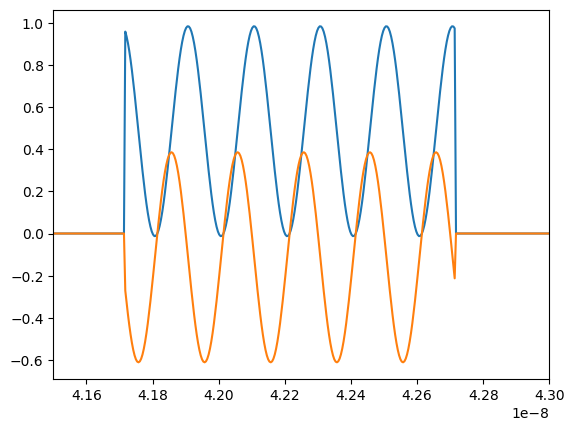

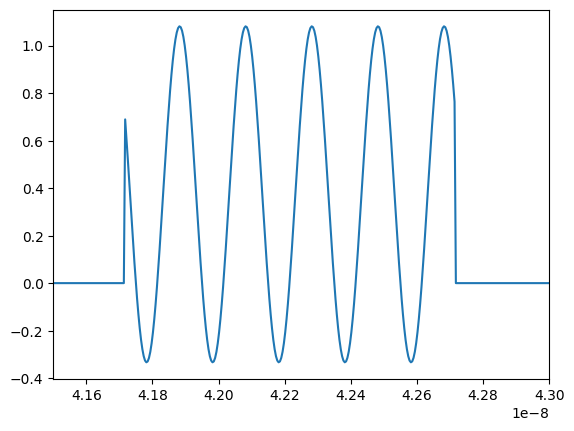

In [ ]:
SeñalRecibida =  Matriz_Dos_Velocidades[2,:]

Señal1 = np.sin(Muestreo_Rapido*2*np.pi*Frecuencia_Portadora)* SeñalRecibida
Señal2 = np.sin(Muestreo_Rapido*2*np.pi*Frecuencia_Portadora + np.pi/2)* SeñalRecibida

plt.figure()
plt.plot(Muestreo_Rapido, Señal1)
plt.plot(Muestreo_Rapido,Señal2)
plt.xlim([0.415*(10**(-7)), 0.43*(10**(-7))])

SeñalesSumadas = Señal1 + Señal2
plt.figure()
plt.plot(Muestreo_Rapido, SeñalesSumadas)
plt.xlim([0.415*(10**(-7)), 0.43*(10**(-7))])



In [12]:
print(1/Periodo_Pulso)

print(Frecuencia_Portadora)



499999999.99999994
2499999999.9999995


In [ ]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Suponiendo que 'señal_modulada' es la señal modulada que has obtenido después de la convolución con la portadora
# Definimos las variables
frecuencia_corte = 1/Periodo_Pulso * 5 # Frecuencia de corte del filtro pasabajos (en Hz)
#frecuencia_corte = Frecuencia_Portadora


# Diseño de un filtro FIR pasabajos con la función firwin
# La longitud del filtro puede ajustarse según el desempeño deseado (mayor longitud = mejor atenuación en la banda de stop)
orden_filtro = 2001 # Orden del filtro FIR
filtro_pasabajo = signal.firwin(orden_filtro, frecuencia_corte, fs=Frecuencia_Muestreo_Rapida, window='hamming')

# Aplicación del filtro a la señal
señal_demodulada = signal.lfilter(filtro_pasabajo, 1.0, SeñalesSumadas)

# Mostrar la señal original y la demodulada
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(SeñalesSumadas[10000:12500])  # Mostrar solo una parte de la señal para claridad
plt.title('Señal Modulda DSB-SC')

plt.subplot(2, 1, 2)
plt.plot(señal_demodulada[10000:12500])  # Mostrar la señal demodulada
plt.title('Señal Demodulada (Baseband)')

plt.tight_layout()
plt.show()

NameError: name 'SeñalesSumadas' is not defined

## Segunda Simulacion: Exploracion de los metodos de analisis espectral


### Librerias y funcione para generar la señal

Frecuencia respiratoria: 0.24966462104925913
Frecuencia cardiaca: 0.7890046601106091
Amplitud respiratoria 1.1605714451279328
Amplitud cardiaca 0.01731993941811405


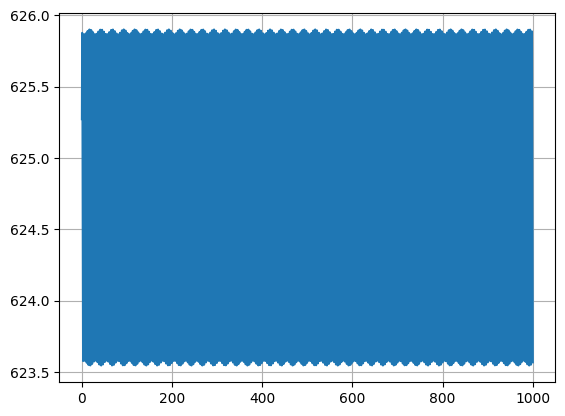

In [1]:

import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import random
import spectrum

def Evaluacion_Señal_Lenta(Tiempo, Distancia, AmpResp, FrecResp, FaseResp, AmpCard, FrecCard, FaseCard):
    # AmpResp es la Amplitud Respiratoria
    # FrecResp es la Frecuencia Respiratoria
    # FaseResp es la Fase de la señal de la respiracion
    # AmpCard es la Amplitud Cardiaca
    # FrecCard es la Frecuancia Cardiaca
    # FaseCard es la Fase de la señal cardiaca
    Señal_Respiratoria = AmpResp * np.sin(2*np.pi*FrecResp*Tiempo + FaseResp)
    Señal_Cardiaca = AmpCard * np.sin(2*np.pi* FrecCard*Tiempo + FaseCard)
    return Distancia + Señal_Respiratoria + Señal_Cardiaca

def Generacion_Muestras(Tiempo_Inicio, Tiempo_Fin, Periodo_Muestreo_Lenta,Seed= None):
      
	if Seed != None:
		np.random.seed(Seed)
            
	###### Defino las constantes para las generaciones de los pulsos de señal lenta
	### Comienzo por la definicion de las constantes de la señal lenta
	Amplitud_Respiratoria_Minima = 0.4
	Amplitud_Respiratoria_Maxima = 1.2
	Amplitud_Cardiaca_Minima = 0.01                  ## Este valor es un valor inicial para simular el ritmo cardiaco
	Amplitud_Cardiaca_Maxima = 0.02              ## Este valor es un valor inicial para la simulacion del ritmo cardiaco

	Frecuencia_Respiratoria_Inferior = 0.1
	Frecuencia_Respiratoria_Superior = 0.35
	Frecuencia_Cardiaca_Superior = 60/60        ## Esto es 60 / frecuencia_Minima porque son ciclos por minuto y tengo que transformar a segundos
	Frecuencia_Cardiaca_Inferior = 60/80        ##

	Distancia_Paciente_Minima = 400
	Distancia_Paciente_Maxima = 1000

	###### Comienzo las simulaciones de la señal lenta
	### Muestra de las variables aleatorias

	Distancia_Paciente = np.random.uniform(Distancia_Paciente_Minima, Distancia_Paciente_Maxima) 

	Amplitud_Respitatoria = np.random.uniform(low = Amplitud_Respiratoria_Minima, high = Amplitud_Respiratoria_Maxima, size = 1)
	Amplitud_Cardiaca = np.random.uniform(low = Amplitud_Cardiaca_Minima, high = Amplitud_Cardiaca_Maxima, size = 1)

	Frecuencia_Respiratoria = np.random.uniform(low = Frecuencia_Respiratoria_Inferior, high = Frecuencia_Respiratoria_Superior, size = 1)
	Frecuencia_Cardiaca = np.random.uniform(low = Frecuencia_Cardiaca_Inferior, high = Frecuencia_Cardiaca_Superior, size = 1)

	Fase_Respiracion = np.random.uniform(0, np.pi)
	Fase_Cardiaca = np.random.uniform(0, np.pi)

	### Muestreo la señal lenta generada / Genero la señal lenta

	ValoresLinea = np.linspace(Tiempo_Inicio,Tiempo_Fin,int(Tiempo_Fin/Periodo_Muestreo_Lenta))
	Resultado_Desfasaje = Evaluacion_Señal_Lenta(ValoresLinea, Distancia_Paciente, Amplitud_Respitatoria, Frecuencia_Respiratoria, 
                                              Fase_Respiracion, Amplitud_Cardiaca, Frecuencia_Cardiaca, Fase_Cardiaca)

	Lista_Elementos = list([Frecuencia_Respiratoria[0], Frecuencia_Cardiaca[0], Amplitud_Respitatoria[0], Amplitud_Cardiaca[0]])
	return ValoresLinea, Resultado_Desfasaje, Lista_Elementos


Tiempo_Inicio = 0
Tiempo_Fin = 1000
Periodo_Muestreo_Lenta = 0.01
Seed = 42

ValoresLinea, Resultado_Desfasaje, Lista_Parametros= Generacion_Muestras(Tiempo_Inicio, Tiempo_Fin, Periodo_Muestreo_Lenta, Seed)

plt.figure()
plt.plot(ValoresLinea,Resultado_Desfasaje)
plt.grid()

print("Frecuencia respiratoria:",Lista_Parametros[0])
print("Frecuencia cardiaca:", Lista_Parametros[1])

print("Amplitud respiratoria", Lista_Parametros[2])
print("Amplitud cardiaca", Lista_Parametros[3])

class Datos_Señal:
	def __init__(self, Lista_Parametros):
		self.Frecuencia_Respiratoria = Lista_Parametros[0]
		self.Frecuencia_Cardiaca = Lista_Parametros[1]
		self.Aplitud_Respiratoria = Lista_Parametros[2]
		self.Amplitud_Cardiaca = Lista_Parametros[3]
		self.Cantidad_Armonicos_Respiratorios = Lista_Parametros[4]
		self.Cantidad_Armonicos_Cardiacos = Lista_Parametros[5]
		


### Exploracion de frecuencia de muestreo 

#### Intervalo general

C:\Users\Bruno\AppData\Local\Temp\ipykernel_13872\912760852.py:37: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()  # Para que no se encimen los títulos y ejes
C:\Users\Bruno\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


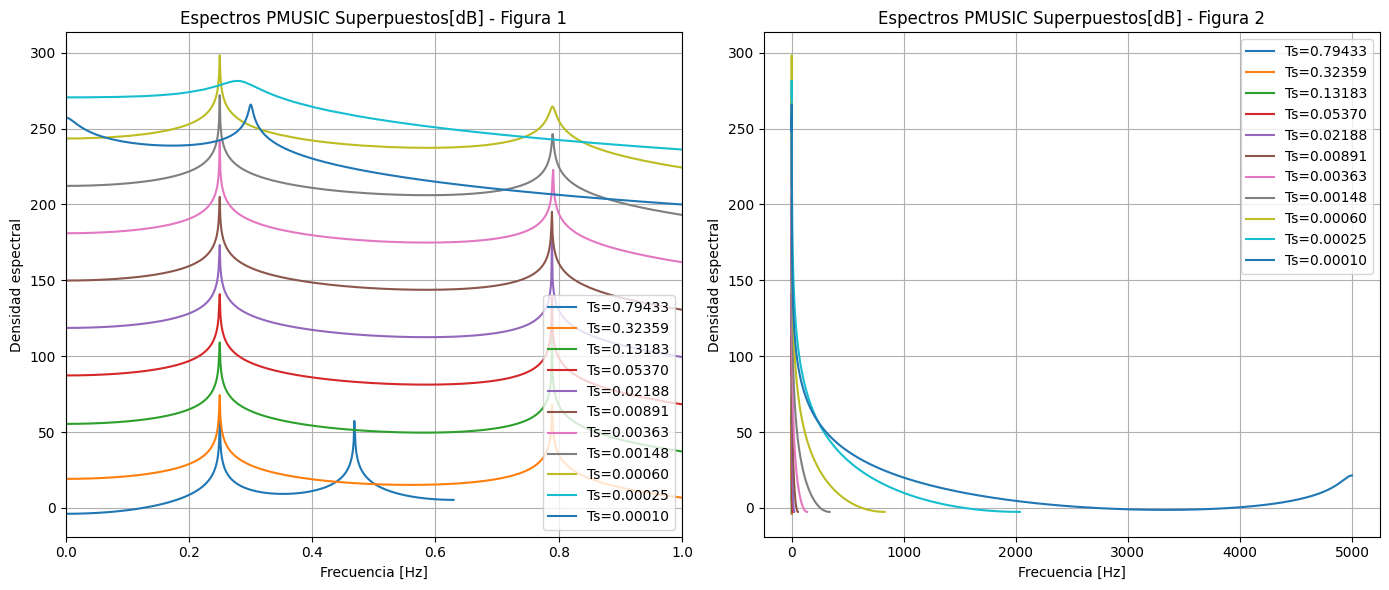

In [2]:
Periodo_Muestreo_Lenta = 10**-np.linspace(start=0.1, stop=4, num=11)
Tiempo_Inicio = 0
Tiempo_Fin = 1000
Cant_Componentes = 5
Comp_Ruido = 1
Seed = 42

# Crear una figura con dos ejes uno al lado del otro
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # Ancho y alto en pulgadas

for i in range(len(Periodo_Muestreo_Lenta)):
	ValoresLinea, Resultado_Desfasaje, Lista_Parametros= Generacion_Muestras(Tiempo_Inicio, Tiempo_Fin, Periodo_Muestreo_Lenta[i], Seed)
	Desfasaje_Señal_Sin_Media = Resultado_Desfasaje-np.mean(Resultado_Desfasaje)
	Estimacion_PMUSIC = spectrum.pmusic(Desfasaje_Señal_Sin_Media, IP=Cant_Componentes, NSIG=Cant_Componentes-Comp_Ruido, sampling=1/Periodo_Muestreo_Lenta[i])
	Estimacion_PMUSIC()

	# Superponer el espectro al mismo eje
	ax1.plot(Estimacion_PMUSIC.frequencies(), 10 * np.log10(Estimacion_PMUSIC.psd), label=f'Ts={Periodo_Muestreo_Lenta[i]:.5f}')
	# Superponer el espectro al mismo eje
	ax2.plot(Estimacion_PMUSIC.frequencies(), 10 * np.log10(Estimacion_PMUSIC.psd), label=f'Ts={Periodo_Muestreo_Lenta[i]:.5f}')

# Estética del plot
ax1.set_title("Espectros PMUSIC Superpuestos[dB] - Figura 1")
ax1.set_xlabel("Frecuencia [Hz]")
ax1.set_ylabel("Densidad espectral")
ax1.legend()
ax1.grid(True)
ax1.set_xlim([0,1])

# Estética del plot
ax2.set_title("Espectros PMUSIC Superpuestos[dB] - Figura 2")
ax2.set_xlabel("Frecuencia [Hz]")
ax2.set_ylabel("Densidad espectral")
ax2.legend()
ax2.grid(True)

plt.tight_layout()  # Para que no se encimen los títulos y ejes
plt.show()


#### Frecuencia de muestreo bajas

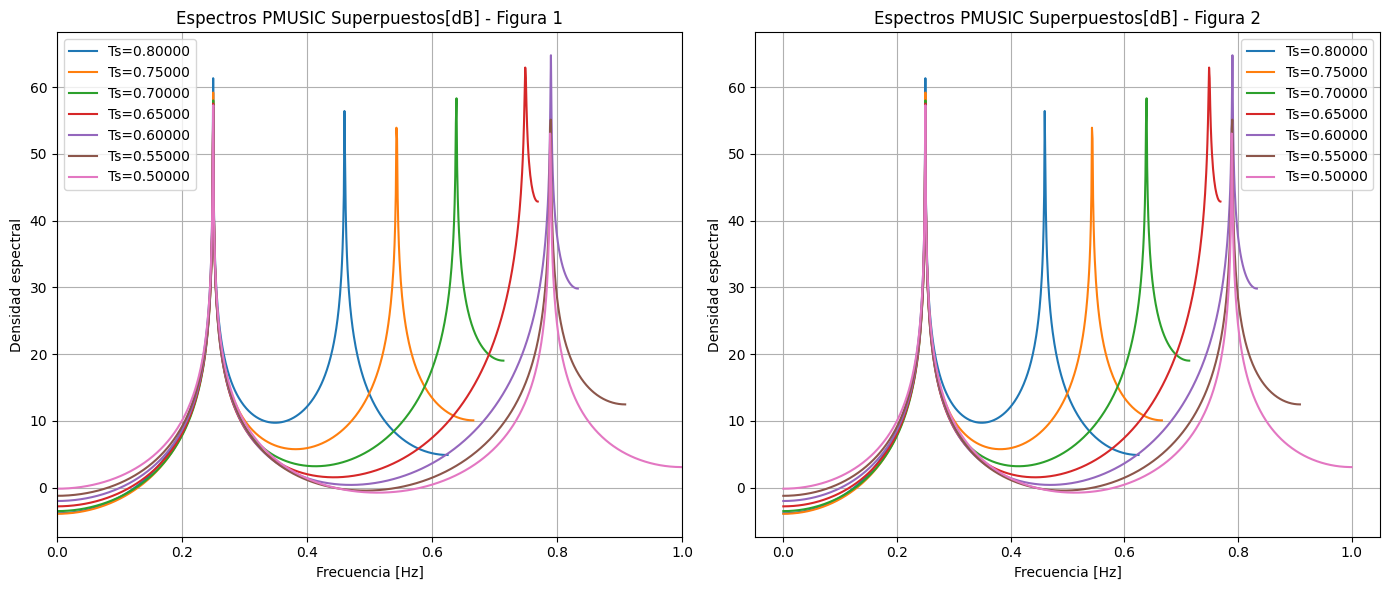

In [3]:
Cantidad_De_Frecuencias = 7
Inicio_Barrido_Exponente = 0.8
Fin_Barrido_Exponente = 0.5
Periodo_Muestreo_Lenta = np.linspace(start=Inicio_Barrido_Exponente, stop=Fin_Barrido_Exponente, num=Cantidad_De_Frecuencias)
Tiempo_Inicio = 0
Tiempo_Fin = 1000
Cant_Componentes = 5
Comp_Ruido = 1
Seed = 42

# Crear una figura con dos ejes uno al lado del otro
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # Ancho y alto en pulgadas

for i in range(len(Periodo_Muestreo_Lenta)):
	ValoresLinea, Resultado_Desfasaje, Lista_Parametros= Generacion_Muestras(Tiempo_Inicio, Tiempo_Fin, Periodo_Muestreo_Lenta[i], Seed)
	Desfasaje_Señal_Sin_Media = Resultado_Desfasaje-np.mean(Resultado_Desfasaje)
	Estimacion_PMUSIC = spectrum.pmusic(Desfasaje_Señal_Sin_Media, IP=Cant_Componentes, NSIG=Cant_Componentes-Comp_Ruido, sampling=1/Periodo_Muestreo_Lenta[i])
	Estimacion_PMUSIC()

	# Superponer el espectro al mismo eje
	ax1.plot(Estimacion_PMUSIC.frequencies(), 10 * np.log10(Estimacion_PMUSIC.psd), label=f'Ts={Periodo_Muestreo_Lenta[i]:.5f}')
	# Superponer el espectro al mismo eje
	ax2.plot(Estimacion_PMUSIC.frequencies(), 10 * np.log10(Estimacion_PMUSIC.psd), label=f'Ts={Periodo_Muestreo_Lenta[i]:.5f}')

# Estética del plot
ax1.set_title("Espectros PMUSIC Superpuestos[dB] - Figura 1")
ax1.set_xlabel("Frecuencia [Hz]")
ax1.set_ylabel("Densidad espectral")
ax1.legend()
ax1.grid(True)
ax1.set_xlim([0,1])

# Estética del plot
ax2.set_title("Espectros PMUSIC Superpuestos[dB] - Figura 2")
ax2.set_xlabel("Frecuencia [Hz]")
ax2.set_ylabel("Densidad espectral")
ax2.legend()
ax2.grid(True)

plt.tight_layout()  # Para que no se encimen los títulos y ejes
plt.show()

#### Frecuencias de muestreo altas

C:\Users\Bruno\AppData\Local\Temp\ipykernel_13872\2887348182.py:41: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()  # Para que no se encimen los títulos y ejes


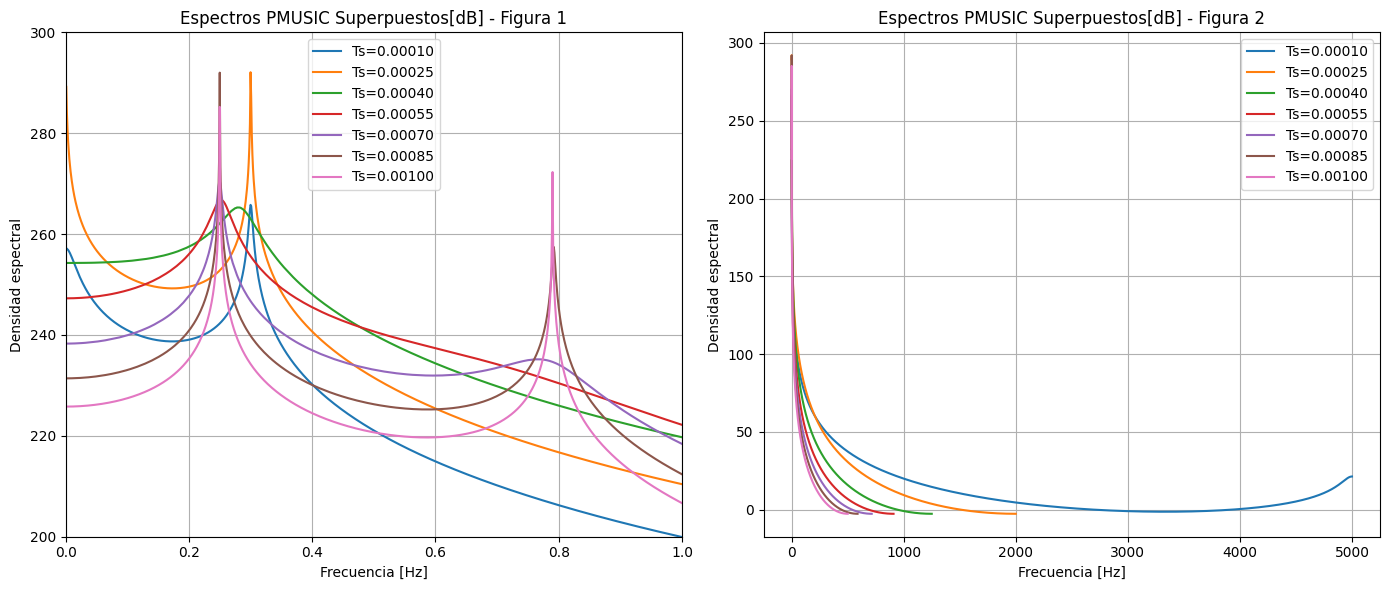

In [4]:
Cantidad_De_Frecuencias = 7
Inicio_Barrido_Exponente = 0.0001
Fin_Barrido_Exponente = 0.0010
Periodo_Muestreo_Lenta = np.linspace(start=Inicio_Barrido_Exponente, stop=Fin_Barrido_Exponente, num=Cantidad_De_Frecuencias)
Tiempo_Inicio = 0
Tiempo_Fin = 1000
Cant_Componentes = 5
Comp_Ruido = 1
Seed = 42

# Crear una figura con dos ejes uno al lado del otro
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # Ancho y alto en pulgadas

for i in range(len(Periodo_Muestreo_Lenta)):
	ValoresLinea, Resultado_Desfasaje, Lista_Parametros= Generacion_Muestras(Tiempo_Inicio, Tiempo_Fin, Periodo_Muestreo_Lenta[i], Seed)
	Desfasaje_Señal_Sin_Media = Resultado_Desfasaje-np.mean(Resultado_Desfasaje)
	Estimacion_PMUSIC = spectrum.pmusic(Desfasaje_Señal_Sin_Media, IP=Cant_Componentes, NSIG=Cant_Componentes-Comp_Ruido, sampling=1/Periodo_Muestreo_Lenta[i])
	Estimacion_PMUSIC()

	# Superponer el espectro al mismo eje
	ax1.plot(Estimacion_PMUSIC.frequencies(), 10 * np.log10(Estimacion_PMUSIC.psd), label=f'Ts={Periodo_Muestreo_Lenta[i]:.5f}')
	# Superponer el espectro al mismo eje
	ax2.plot(Estimacion_PMUSIC.frequencies(), 10 * np.log10(Estimacion_PMUSIC.psd), label=f'Ts={Periodo_Muestreo_Lenta[i]:.5f}')

# Estética del plot
ax1.set_title("Espectros PMUSIC Superpuestos[dB] - Figura 1")
ax1.set_xlabel("Frecuencia [Hz]")
ax1.set_ylabel("Densidad espectral")
ax1.legend()
ax1.grid(True)
ax1.set_xlim([0,1])
ax1.set_ylim([200,300])

# Estética del plot
ax2.set_title("Espectros PMUSIC Superpuestos[dB] - Figura 2")
ax2.set_xlabel("Frecuencia [Hz]")
ax2.set_ylabel("Densidad espectral")
ax2.legend()
ax2.grid(True)

plt.tight_layout()  # Para que no se encimen los títulos y ejes
plt.show()

### Exploración del largo de la muestra

#### Intervalo genetal

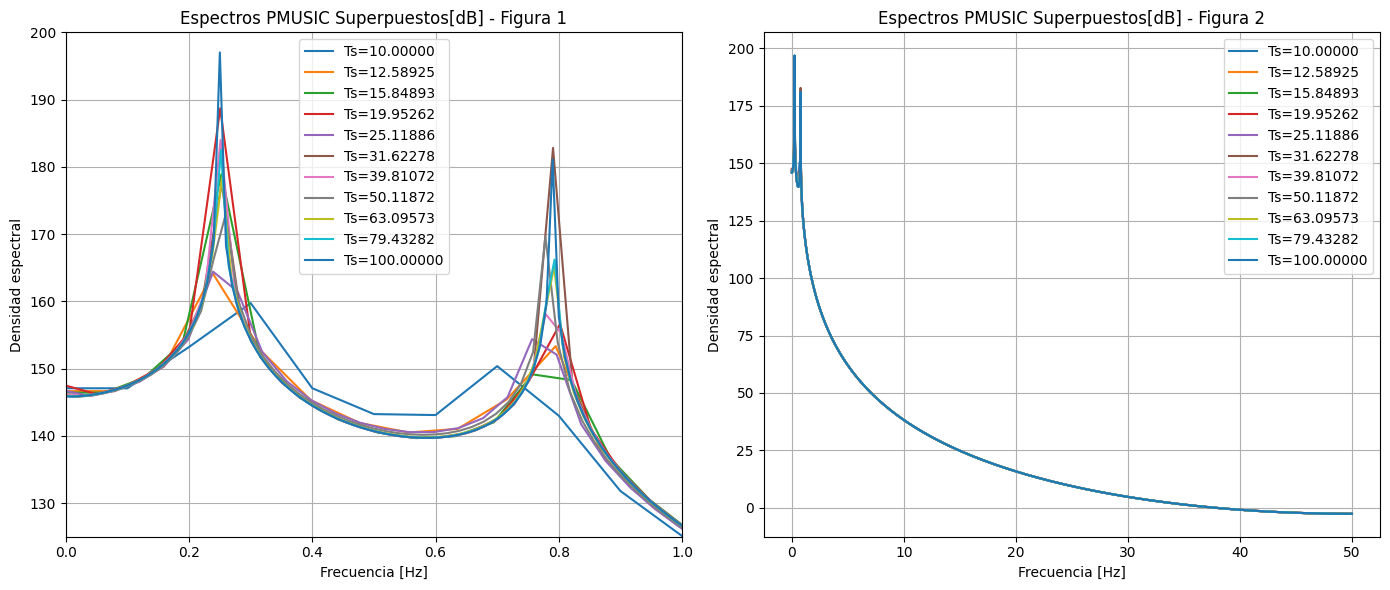

In [5]:
#Periodo_Muestreo_Lenta = 10**-np.linspace(start=0.1, stop=4, num=11) ## Ejemplo de escala logaritmica
Periodo_Muestreo_Lenta = 0.01
Tiempo_Inicio = 0
Tiempo_Fin = 10**np.linspace(start=1, stop=2, num=11)
Cant_Componentes = 5
Comp_Ruido = 1
Seed = 42

# Crear una figura con dos ejes uno al lado del otro
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # Ancho y alto en pulgadas

for i in range(len(Tiempo_Fin)):
	ValoresLinea, Resultado_Desfasaje, Lista_Parametros= Generacion_Muestras(Tiempo_Inicio, Tiempo_Fin[i], Periodo_Muestreo_Lenta, Seed)
	Desfasaje_Señal_Sin_Media = Resultado_Desfasaje-np.mean(Resultado_Desfasaje)
	Estimacion_PMUSIC = spectrum.pmusic(Desfasaje_Señal_Sin_Media, IP=Cant_Componentes, NSIG=Cant_Componentes-Comp_Ruido, sampling=1/Periodo_Muestreo_Lenta)
	Estimacion_PMUSIC()

	# Superponer el espectro al mismo eje
	ax1.plot(Estimacion_PMUSIC.frequencies(), 10 * np.log10(Estimacion_PMUSIC.psd), label=f'Ts={Tiempo_Fin[i]:.5f}')
	# Superponer el espectro al mismo eje
	ax2.plot(Estimacion_PMUSIC.frequencies(), 10 * np.log10(Estimacion_PMUSIC.psd), label=f'Ts={Tiempo_Fin[i]:.5f}')

# Estética del plot
ax1.set_title("Espectros PMUSIC Superpuestos[dB] - Figura 1")
ax1.set_xlabel("Frecuencia [Hz]")
ax1.set_ylabel("Densidad espectral")
ax1.legend()
ax1.grid(True)
ax1.set_xlim([0,1])
ax1.set_ylim([125,200])

# Estética del plot
ax2.set_title("Espectros PMUSIC Superpuestos[dB] - Figura 2")
ax2.set_xlabel("Frecuencia [Hz]")
ax2.set_ylabel("Densidad espectral")
ax2.legend()
ax2.grid(True)

plt.tight_layout()  # Para que no se encimen los títulos y ejes
plt.show()

#### Caso limite de invervalos muy cortos

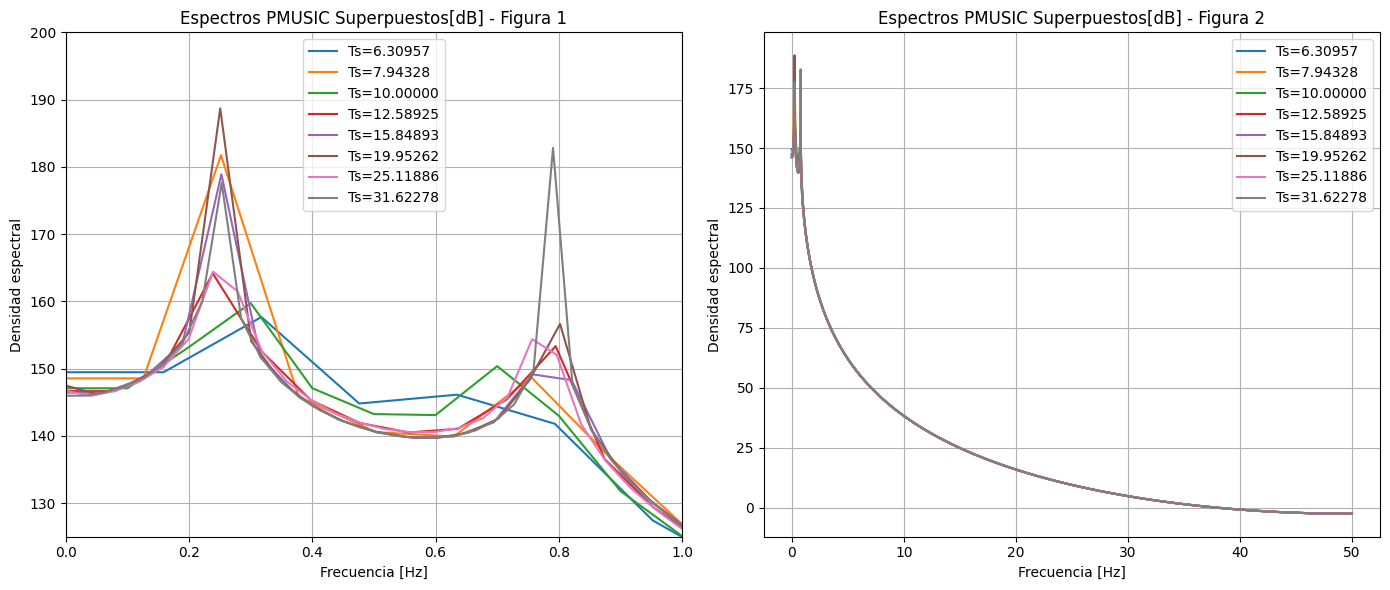

In [6]:
Periodo_Muestreo_Lenta = 0.01
Tiempo_Inicio = 0
Tiempo_Fin = 10**np.linspace(start=0.8, stop=1.5, num=8)
Cant_Componentes = 5
Comp_Ruido = 1
Seed = 42

# Crear una figura con dos ejes uno al lado del otro
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # Ancho y alto en pulgadas

for i in range(len(Tiempo_Fin)):
	ValoresLinea, Resultado_Desfasaje, Lista_Parametros= Generacion_Muestras(Tiempo_Inicio, Tiempo_Fin[i], Periodo_Muestreo_Lenta, Seed)
	Desfasaje_Señal_Sin_Media = Resultado_Desfasaje-np.mean(Resultado_Desfasaje)
	Estimacion_PMUSIC = spectrum.pmusic(Desfasaje_Señal_Sin_Media, IP=Cant_Componentes, NSIG=Cant_Componentes-Comp_Ruido, sampling=1/Periodo_Muestreo_Lenta)
	Estimacion_PMUSIC()

	# Superponer el espectro al mismo eje
	ax1.plot(Estimacion_PMUSIC.frequencies(), 10 * np.log10(Estimacion_PMUSIC.psd), label=f'Ts={Tiempo_Fin[i]:.5f}')
	# Superponer el espectro al mismo eje
	ax2.plot(Estimacion_PMUSIC.frequencies(), 10 * np.log10(Estimacion_PMUSIC.psd), label=f'Ts={Tiempo_Fin[i]:.5f}')

# Estética del plot
ax1.set_title("Espectros PMUSIC Superpuestos[dB] - Figura 1")
ax1.set_xlabel("Frecuencia [Hz]")
ax1.set_ylabel("Densidad espectral")
ax1.legend()
ax1.grid(True)
ax1.set_xlim([0,1])
ax1.set_ylim([125,200])

# Estética del plot
ax2.set_title("Espectros PMUSIC Superpuestos[dB] - Figura 2")
ax2.set_xlabel("Frecuencia [Hz]")
ax2.set_ylabel("Densidad espectral")
ax2.legend()
ax2.grid(True)

plt.tight_layout()  # Para que no se encimen los títulos y ejes
plt.show()

### Exploracion de la cercania de las frecuencias


#### Setup

In [7]:
def Generacion_Muestras_Directa(Tiempo_Inicio, Tiempo_Fin, Periodo_Muestreo_Lenta, Objeto_Datos_Señal, Seed = None):
      
	if Seed != None:
		np.random.seed(Seed)

	###### Defino las constantes para las generaciones de los pulsos de señal lenta
	### Comienzo por la definicion de las constantes de la señal lenta
	Distancia_Paciente_Minima = 400
	Distancia_Paciente_Maxima = 1000

	###### Comienzo las simulaciones de la señal lenta
	### Muestra de las variables aleatorias
	Distancia_Paciente = np.random.uniform(Distancia_Paciente_Minima, Distancia_Paciente_Maxima) 

	Amplitud_Respitatoria = Objeto_Datos_Señal.Aplitud_Respiratoria
	Amplitud_Cardiaca = Objeto_Datos_Señal.Amplitud_Cardiaca

	Frecuencia_Respiratoria = Objeto_Datos_Señal.Frecuencia_Respiratoria
	Frecuencia_Cardiaca = Objeto_Datos_Señal.Frecuencia_Cardiaca

	Fase_Respiracion = np.random.uniform(0, np.pi)
	Fase_Cardiaca = np.random.uniform(0, np.pi)

	ValoresLinea = np.linspace(Tiempo_Inicio,Tiempo_Fin,int(Tiempo_Fin/Periodo_Muestreo_Lenta))
	
	Resultado_Desfasaje = Evaluacion_Señal_Lenta(ValoresLinea, Distancia_Paciente, Amplitud_Respitatoria, Frecuencia_Respiratoria, 
                                              Fase_Respiracion, Amplitud_Cardiaca, Frecuencia_Cardiaca, Fase_Cardiaca)

	return ValoresLinea, Resultado_Desfasaje


Frecuencia respiratoria: 0.24966462104925913
Frecuencia cardiaca: 0.7890046601106091
Amplitud respiratoria 1.1605714451279328
Amplitud cardiaca 0.01731993941811405


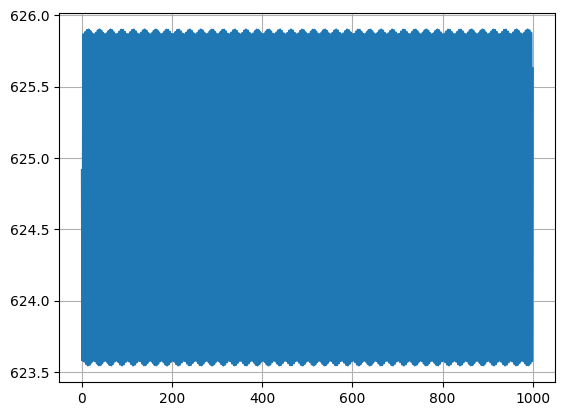

In [8]:
Lista_Datos = list([0.24966462104925913, 0.7890046601106091, 1.1605714451279328, 0.01731993941811405, 1, 1])
Objeto_Datos_Señal = Datos_Señal(Lista_Datos)

Tiempo_Inicio = 0
Tiempo_Fin = 1000
Periodo_Muestreo_Lenta = 0.01
Seed = 42

ValoresLinea, Resultado_Desfasaje = Generacion_Muestras_Directa(Tiempo_Inicio, Tiempo_Fin, Periodo_Muestreo_Lenta, Objeto_Datos_Señal, Seed)

plt.figure()
plt.plot(ValoresLinea,Resultado_Desfasaje)
plt.grid()

print("Frecuencia respiratoria:",Lista_Datos[0])
print("Frecuencia cardiaca:", Lista_Datos[1])

print("Amplitud respiratoria", Lista_Datos[2])
print("Amplitud cardiaca", Lista_Datos[3])


#### Modificación de la cercania de las dos frecuencias